In [1]:
import os
from shutil import rmtree

dataset_dirpath = "../data/Websites"
if os.path.exists(dataset_dirpath):
    rmtree(dataset_dirpath)

os.mkdir(dataset_dirpath)


In [2]:
from glob import glob
from shutil import copyfile
from tqdm import tqdm

split_dirpath = os.path.join(dataset_dirpath, "train")
os.mkdir(split_dirpath)

image_filepaths = glob("../data/Website Screenshots.v1-raw.coco/train/*.jpg")
image_filepaths = sorted(image_filepaths)[::2]  # remove duplicate images
for i, image_filepath in enumerate(tqdm(image_filepaths)):
    copyfile(image_filepath, os.path.join(split_dirpath, "%03d.jpg" % (i + 1)))


100%|██████████| 844/844 [00:00<00:00, 2478.70it/s]


In [3]:
split_dirpath = os.path.join(dataset_dirpath, "valid")
os.mkdir(split_dirpath)

image_filepaths = glob("../data/Website Screenshots.v1-raw.coco/valid/*.jpg")
image_filepaths = sorted(image_filepaths)[::2]  # remove duplicate images
for i, image_filepath in enumerate(tqdm(image_filepaths)):
    copyfile(image_filepath, os.path.join(split_dirpath, "%03d.jpg" % (i + 1)))


100%|██████████| 241/241 [00:00<00:00, 2195.30it/s]


In [4]:
split_dirpath = os.path.join(dataset_dirpath, "test")
os.mkdir(split_dirpath)

image_filepaths = glob("../data/Website Screenshots.v1-raw.coco/test/*.jpg")
image_filepaths = sorted(image_filepaths)[::2]  # remove duplicate images
for i, image_filepath in enumerate(tqdm(image_filepaths)):
    copyfile(image_filepath, os.path.join(split_dirpath, "%03d.jpg" % (i + 1)))


100%|██████████| 121/121 [00:00<00:00, 2346.55it/s]


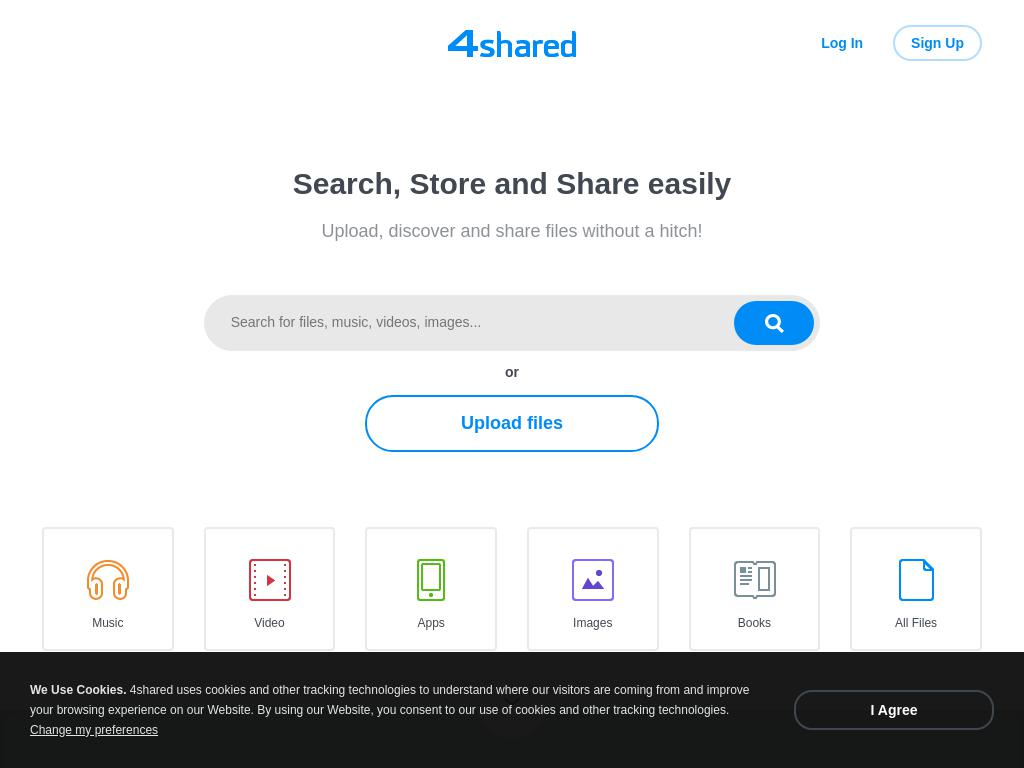

In [5]:
from PIL import Image as pil_image

image_filepath = "../data/Websites/train/001.jpg"
image = pil_image.open(image_filepath)
image


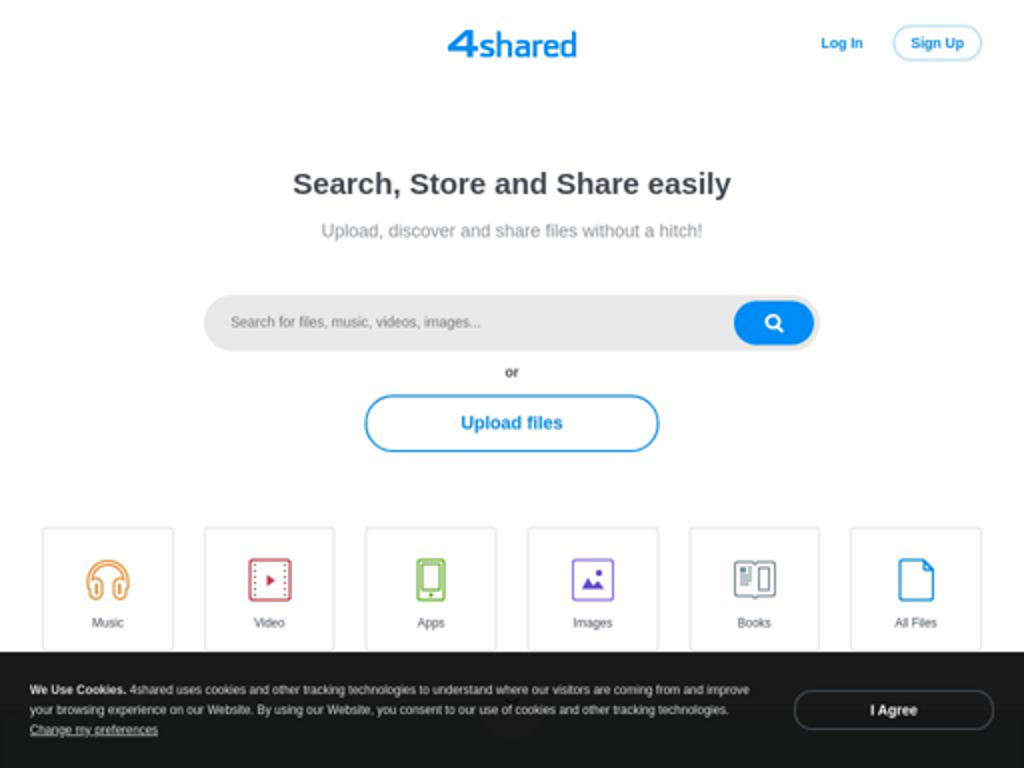

In [8]:
from PIL.Image import Resampling as resampling

FACTOR = 2
RESAMPLE = resampling.BICUBIC
width, height = image.size
image.resize((width // FACTOR, height // 2), RESAMPLE).resize((width, height), RESAMPLE)


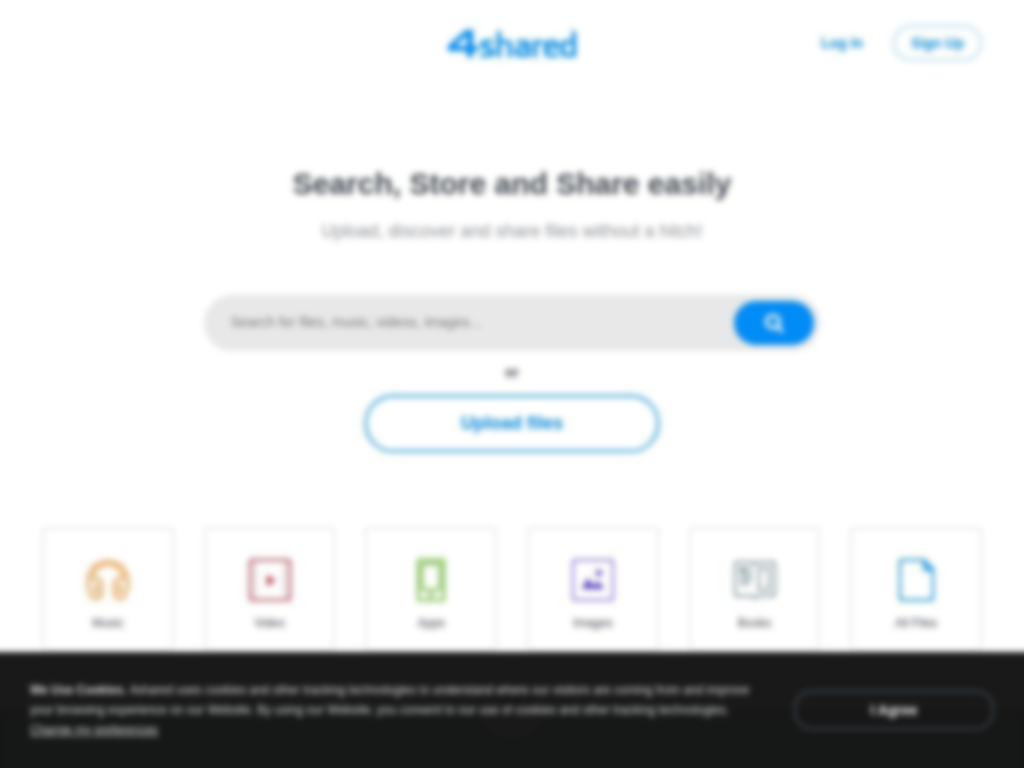

In [10]:
from PIL import ImageFilter as image_filter

RADIUS = 3
image.filter(image_filter.GaussianBlur(RADIUS))


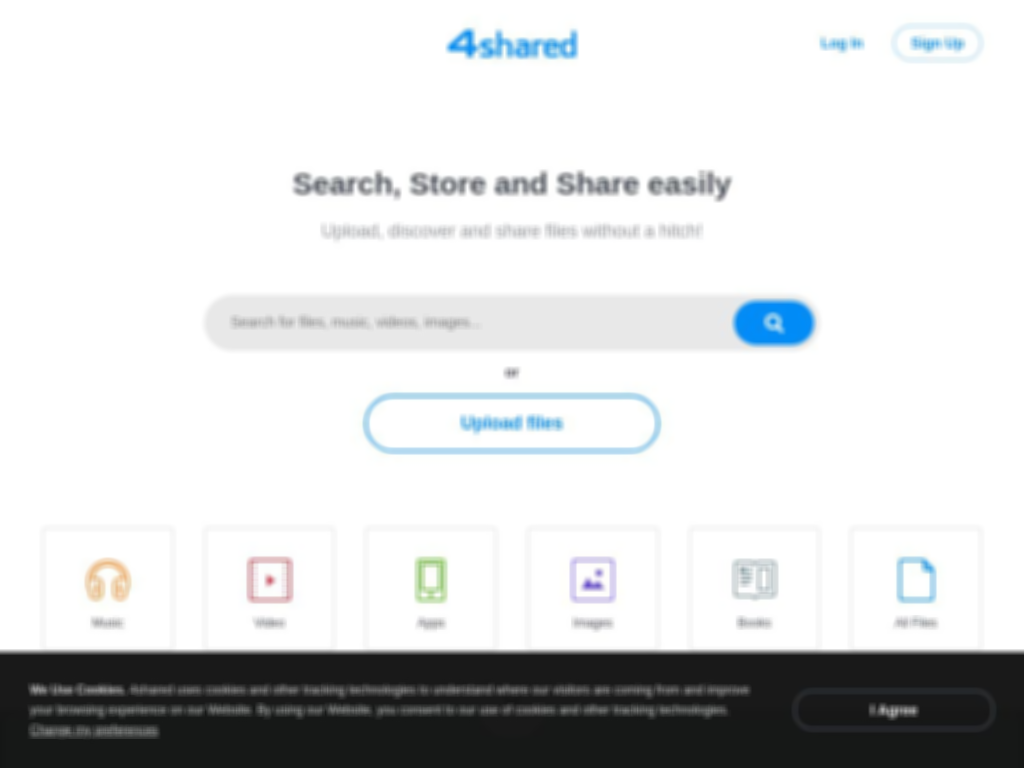

In [13]:
from torchvision.transforms import functional as TF

KERNEL_SIZE = 7
SIGMA = 5.0
TF.gaussian_blur(image, KERNEL_SIZE, SIGMA)


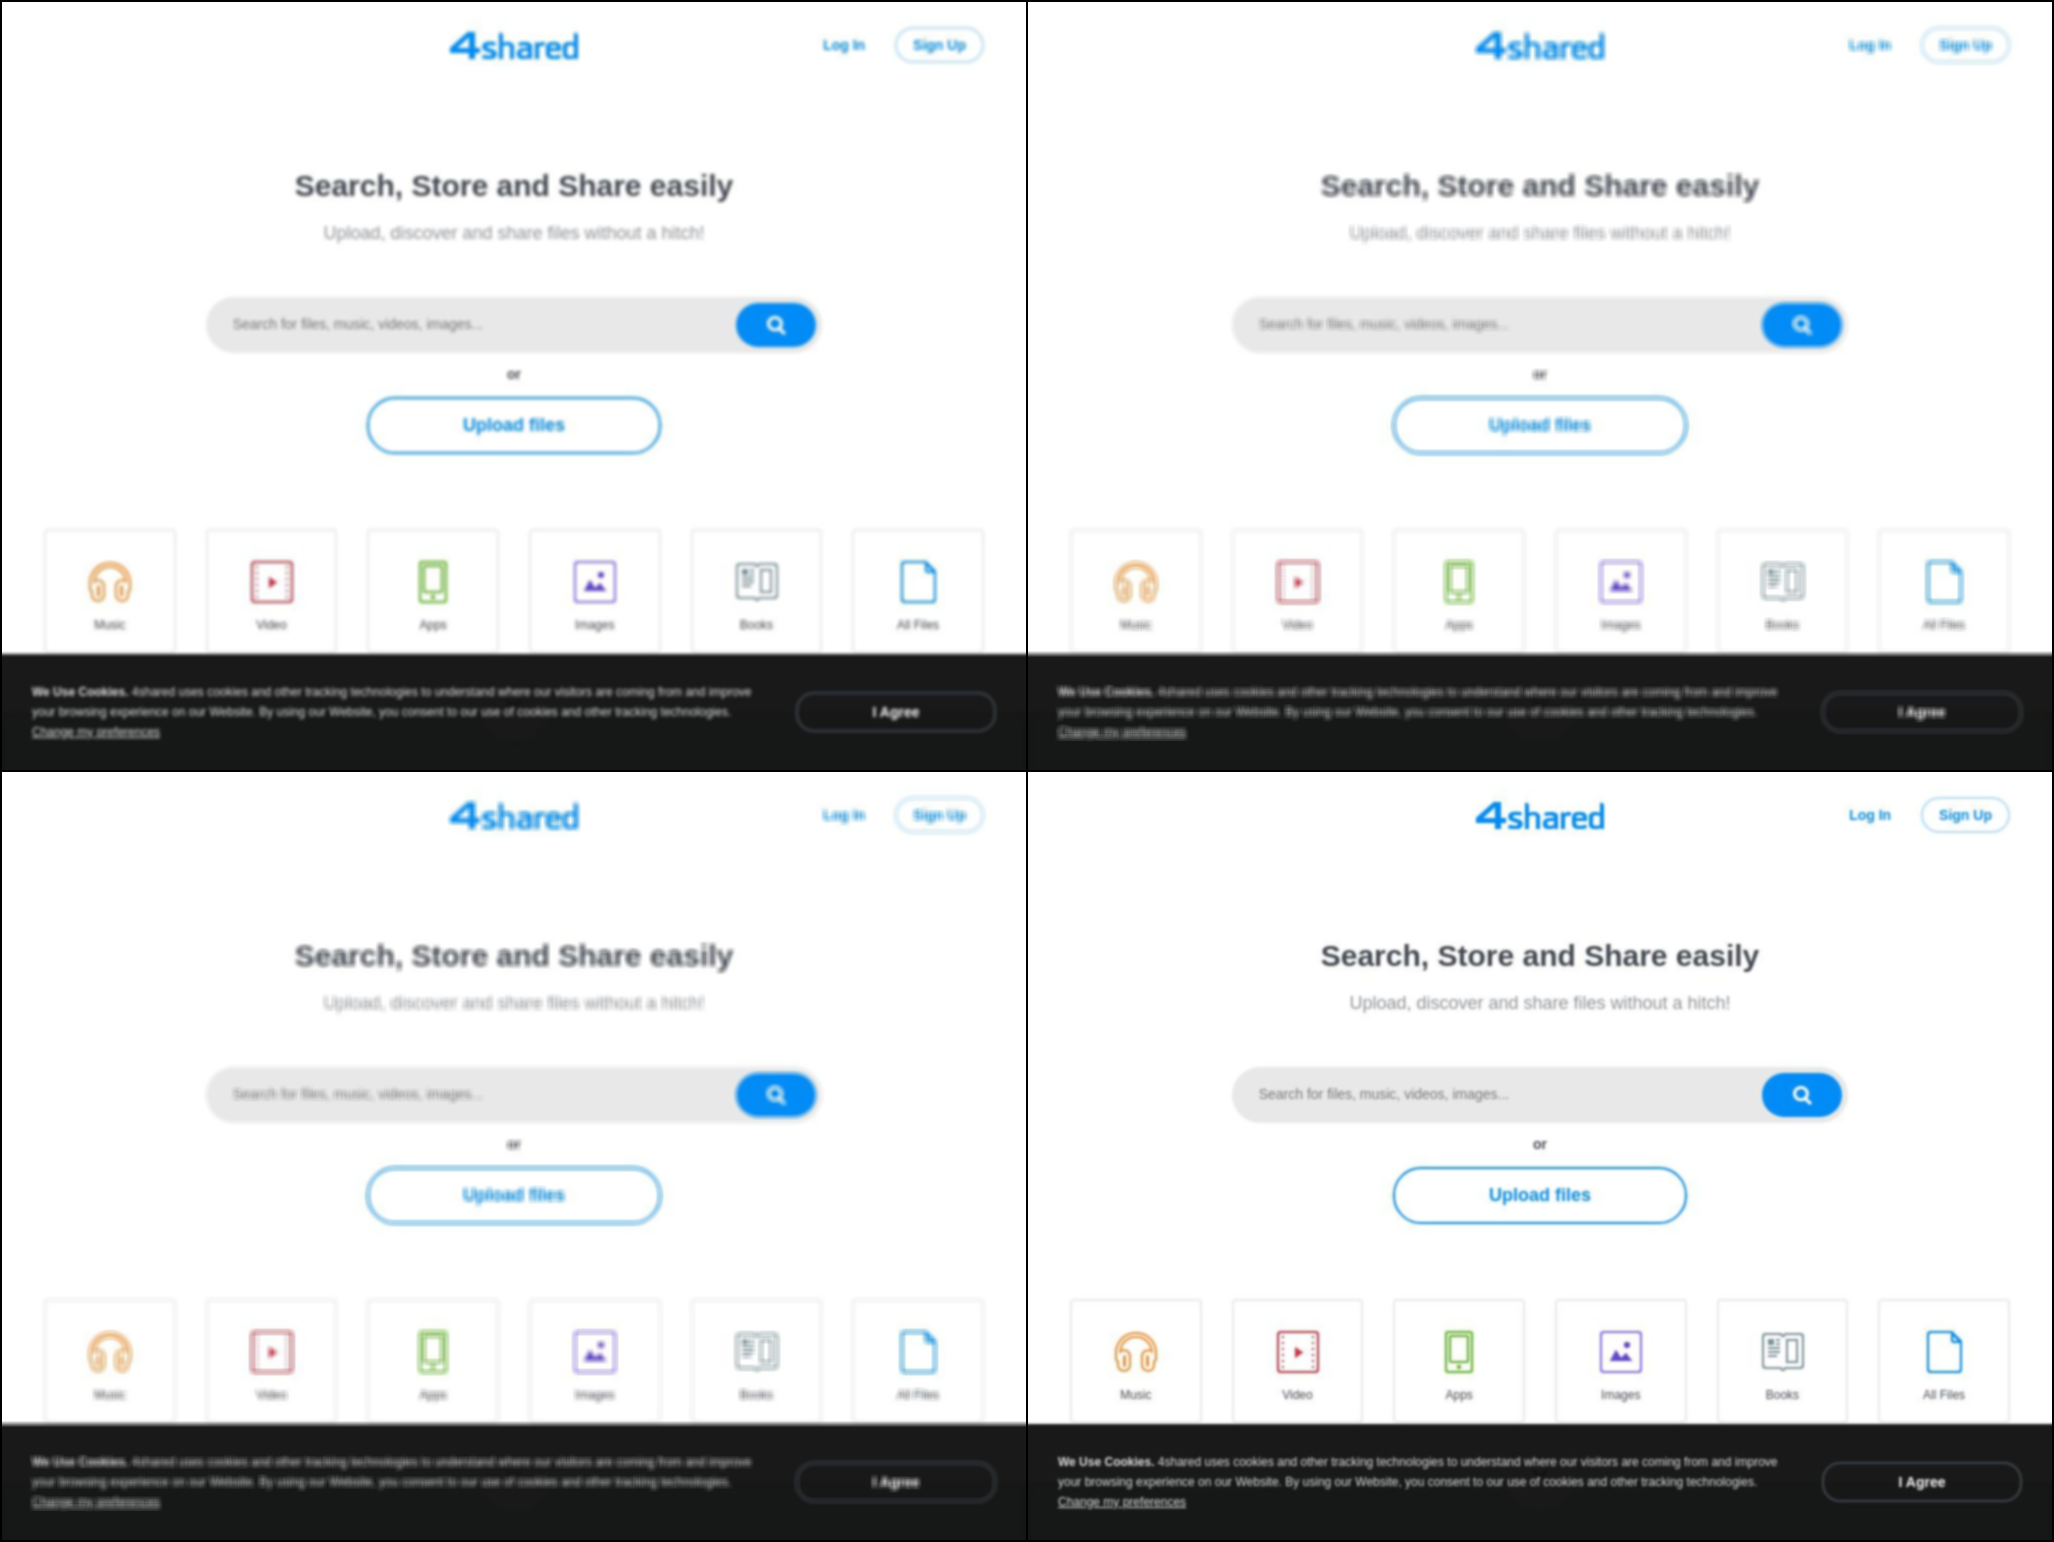

In [23]:
from matplotlib import pyplot as plt
from torchvision import transforms as T
from torchvision.utils import make_grid

transform = T.GaussianBlur(kernel_size=7, sigma=(1.0, 5.0))
images = [TF.pil_to_tensor(transform(image)) for _ in range(4)]
TF.to_pil_image(make_grid(images, nrow=2))
